# **LINEAR REGRESSION**
Linear Regression berarti metode regresi dengan jumlah satu variabel dependen y dan satu variabel independen x (predictor variables)

**Asumsi** (https://medium.com/@ayoakinkugbe/when-to-use-linear-regression-6b7057ebd01f)

## **Fungsi**

y^ = a + bx

y^ = nilai y dalam hal ini garis regresi

a = intercept

b = slope

x = independent variable (predictor variables)


## **Formulasi**
Dalam menentukan linear regresi hal yang paling penting adalah mencari konstanta a (intercept) dan b (slope) dengan nilai minimum.

Sebagai contoh data scatter berikut

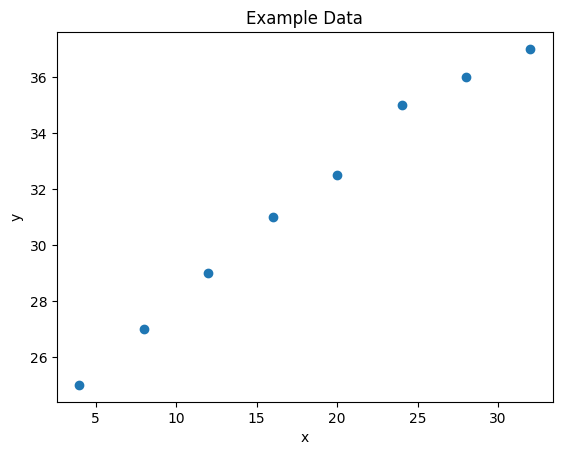

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
x = np.array([4,8,12,16,20,24,28,32])
y = np.array([25,27,29,31,32.5,35,36,37])

# plot
fig, ax = plt.subplots()

ax.scatter(x, y)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Example Data')

plt.show()


Kemudian ditarik garis linear fungsi y^ (y2) dengan asumsi hubungan x dan y terwakili dengan garis tersebut. Garis ini dibuat hanya sebagai ilustrasi untuk membantu melakukan formulasi.

In [ ]:


y2 = np.array([26.5,
               (26.5 + 3),
               (26.5 + (3*2)),
               (26.5 + (3*3)),
               (26.5 + (3*4)),
               (26.5 + (3*5)),
               (26.5 + (3*6)),
               (26.5 + (3*7)),
               (26.5 + (3*8))])

def plot_error_y(ax, x,y,y2):
    i = 0
    for point in x:
        bottom = y2[i] if y[i] > y2[i] else y[i]
        ax.bar(point,abs(y2[i]-y[i]),.02,bottom,color='tab:red')
        ax.annotate("e" + str(i) ,xy=(point,bottom + (abs(y2[i]-y[i]))/2))
        i = i + 1
        
# plot
fig, ax = plt.subplots()

plot_error_y(ax,x,y,y2)
ax.scatter(x, y)
ax.plot(x, y2, 'xkcd:crimson')
ax.annotate("y2" ,xy=((x[0]+x[len(x)-1])/2,(y2[0]+y2[len(x)-1])/2 + 2))



Grafik yang dihasilkan sebelumnya menggambarkan selisih antara titik-titik fungsi y2 dengan titik-titik variabel independent ditandai dengan garis merah. Hal inilah yang dimaksud dengan error atau kesalahan **error (e1,e2,...,en)**.

Permasalahan pada regresi linier adalah bagaimana mendapatkan nilai minimum dari error sehingga dihasilkan model yang lebih akurat. Maka optimasi fungsi dilakukan dengan formulasi berikut:

Persamaan Regresi Linier

y^2 = ax + b

Persamaan Error (Selisih)

error = y^2-y

error = (ax+b) - y ... (1)

Kemudian Persamaan (1) dikuadratkan untuk mencari **squared error** (SE)

squared_error = ((ax+b) - y)^2 ... (2)

Karna terdapat banyak instance pada dataset (1), maka seluruh error dijumlahkan (summation) didapatkan **Sum Squared Error** (SSE)

SSE = (ax_i+b - y_i)^2 + ... +  (ax_n+b - y_n)^2 ... (3)

Selanjutnya adalah bagaimana mendapatkan error dengan nilai minimum. Untuk mencari nilai minimum suatu fungsi, maka turunan pertama harus bernilai 0. Dalam hal ini dilakukan turunan parsial terhadap a dan b. Turunan rumus dapat dilihat di.

https://fisikaveritas.blogspot.com/2013/06/penurunan-rumus-metode-kuadrat-terkecil.html

## Formula

y2 = a + bx

a (intercept) = sum(y)*sum(x^2) - sum(x)*sum(xy) / n*sum(x^2) - sum(x)^2

b (slope) = n*sum(xy) - sum(x)*sum(y) / n*sum(x^2) - sum(x)^2 

x = independent variable

Script from scratch:

In [ ]:

# Formula: 
# y2 = a + bx
# a (intercept) = sum(y)*sum(x^2) - sum(x)*sum(xy) / n*sum(x^2) - sum(x)^2
# b (slope) = n*sum(xy) - sum(x)*sum(y) / n*sum(x^2) - sum(x)^2 
# x = independent variable

def regression_intercept_slope(x,y):
    sum_y = np.sum(y)
    sum_x = np.sum(x)
    sum_x_power = np.sum(np.power(x,2))
    sum_xy = np.sum(np.multiply(x,y))

    #size of data
    n = len(x)

    # intercept
    a = ((sum_y * sum_x_power) - (sum_x * sum_xy)) / ((n*sum_x_power) - (sum_x * sum_x))

    # slope
    b = ((n*sum_xy) - (sum_x*sum_y)) / (n*sum_x_power - (sum_x * sum_x))

    return (a,b)



# x,y defined in the first code section
# Now we can find the optimum regression intercept and slope for y2
intercept, slope = regression_intercept_slope(x,y)

y2 = []

for point in x:
    y2.append(intercept + (slope * point))

print (y2)


[np.float64(25.375), np.float64(27.142857142857142), np.float64(28.910714285714285), np.float64(30.67857142857143), np.float64(32.44642857142857), np.float64(34.214285714285715), np.float64(35.98214285714286), np.float64(37.75)]


**Regresi linier merupakan metode regresi dengan garis lurus yang mencari nilai error minimum**